In [40]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Read data from the spreadsheet
data = pd.read_csv("cleaned_mlready_combinedData1.csv")

In [41]:
# check out fire and no fire ratio
data["Fire"].value_counts()

0    7156
1     115
Name: Fire, dtype: int64

In [42]:
# divide data into train, and testing
X = data.copy()
y = X['Fire']
X = X.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
#Default training set, get a model baseline
clf_base = DecisionTreeClassifier(random_state=4)
clf_base = clf_base.fit(X_train, y_train)

In [44]:
#baseline predictions, amd confusion matrix of the baseline model
prediction_base = clf_base.predict(X_test)
confusion_matrix(y_test, prediction_base, labels=[0,1])

array([[1407,   26],
       [  18,    4]], dtype=int64)

In [45]:
#look at the importance of each feature
feature_names = X.columns
pd.DataFrame(clf_base.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.067648
T_DAILY_AVG,0.100747
P_DAILY_CALC,0.026203
SOLARAD_DAILY,0.110432
SUR_TEMP_DAILY_MAX,0.063402
SUR_TEMP_DAILY_AVG,0.029473
RH_DAILY_MIN,0.116404
RH_DAILY_AVG,0.062600
SOIL_MOISTURE_5_DAILY,0.049371
SOIL_MOISTURE_10_DAILY,0.044745


In [46]:
#Get report on base model
print(classification_report(y_test,prediction_base))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1433
           1       0.13      0.18      0.15        22

    accuracy                           0.97      1455
   macro avg       0.56      0.58      0.57      1455
weighted avg       0.97      0.97      0.97      1455



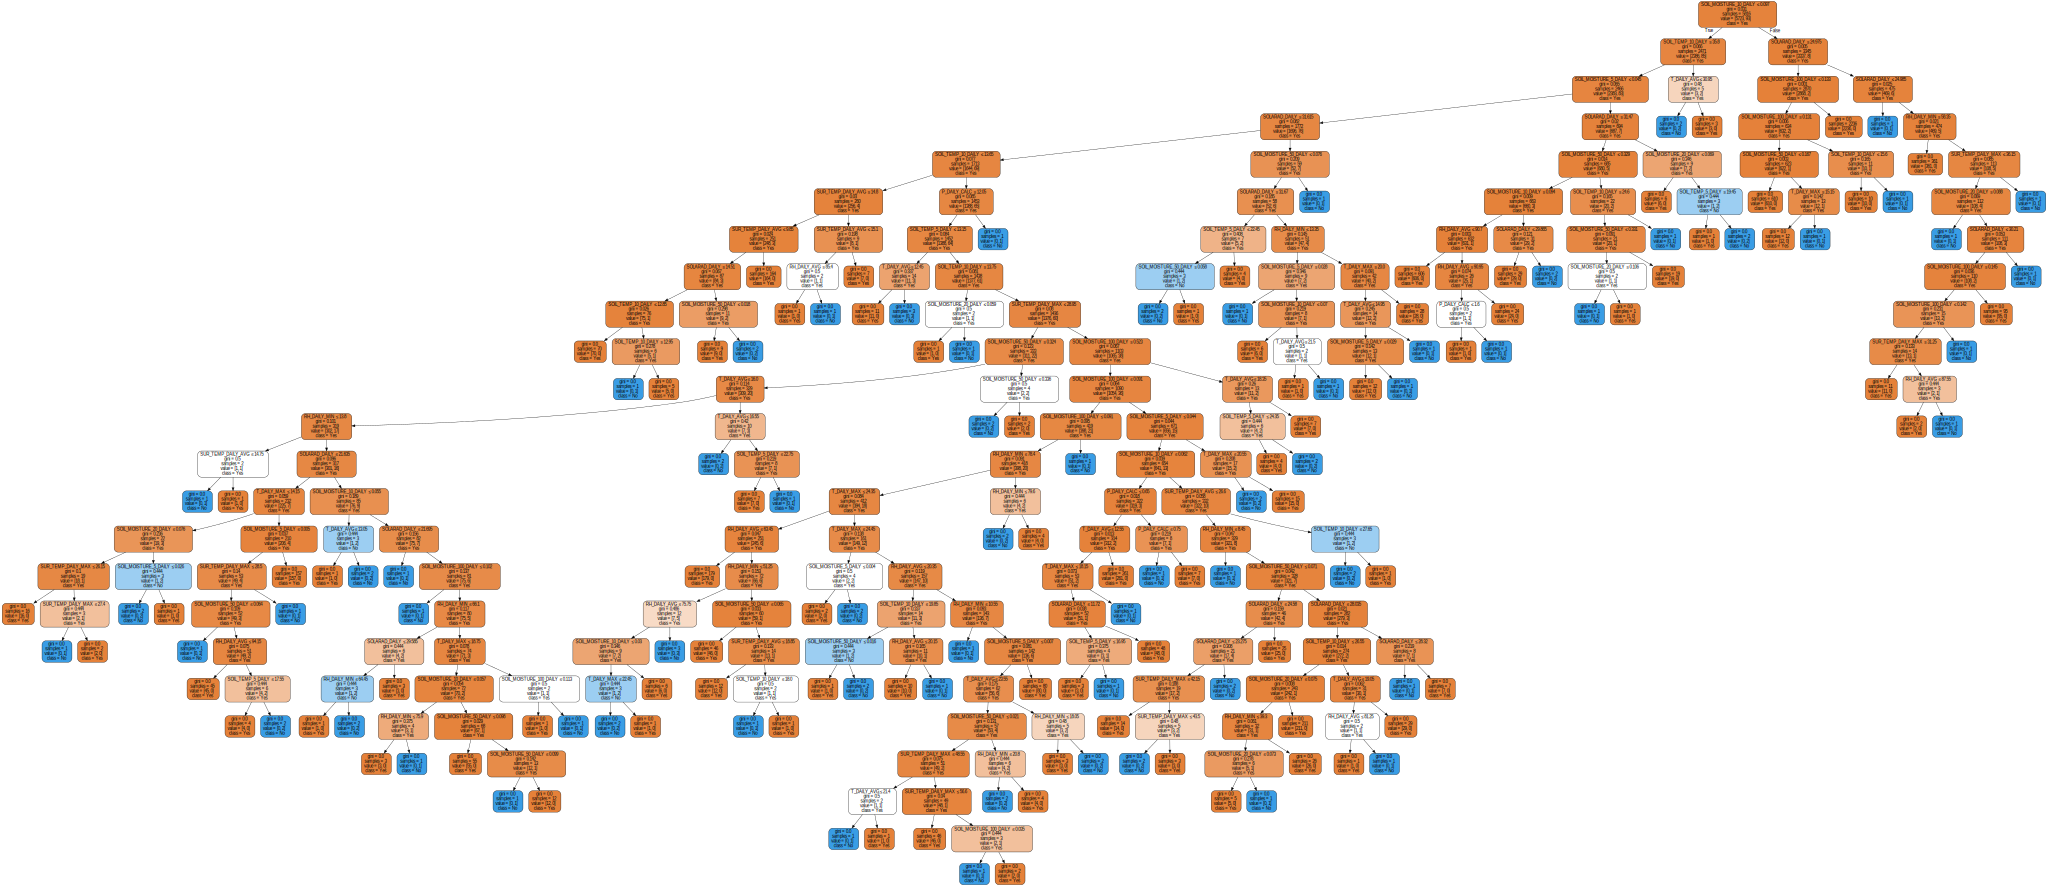

In [47]:
#Base model decision tree structure view
visualization = tree.export_graphviz(clf_base, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [48]:
#cross validation of the base model:Accuracy
score = cross_val_score(clf_base, X, y, cv= 5, scoring="accuracy")
score

array([0.92920962, 0.9477304 , 0.87070151, 0.97248968, 0.95873453])

In [49]:
#Tuned decision tree training with no oversampling
clf_Iteration1 = DecisionTreeClassifier(class_weight={1:65,0:1}, max_depth=8, criterion="entropy", random_state=4)
clf_Iteration1 = clf_Iteration1.fit(X_train, y_train)

In [50]:
#make another prediction on the new model and show confusion matrix of the new model on test data
predictions_iteration1 = clf_Iteration1.predict(X_test)
confusion_matrix(y_test, predictions_iteration1, labels=[0,1])

array([[1016,  417],
       [   1,   21]], dtype=int64)

In [51]:
#look at the importance of each feature of the improved model
clf_Iteration1.feature_importances_
feature_names = X.columns
pd.DataFrame(clf_Iteration1.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.000000
T_DAILY_AVG,0.000000
P_DAILY_CALC,0.000000
SOLARAD_DAILY,0.000000
SUR_TEMP_DAILY_MAX,0.003677
SUR_TEMP_DAILY_AVG,0.000000
RH_DAILY_MIN,0.094546
RH_DAILY_AVG,0.005045
SOIL_MOISTURE_5_DAILY,0.636595
SOIL_MOISTURE_10_DAILY,0.000000


In [52]:
#Get report on base model
print(classification_report(y_test,predictions_iteration1))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      1433
           1       0.05      0.95      0.09        22

    accuracy                           0.71      1455
   macro avg       0.52      0.83      0.46      1455
weighted avg       0.98      0.71      0.82      1455



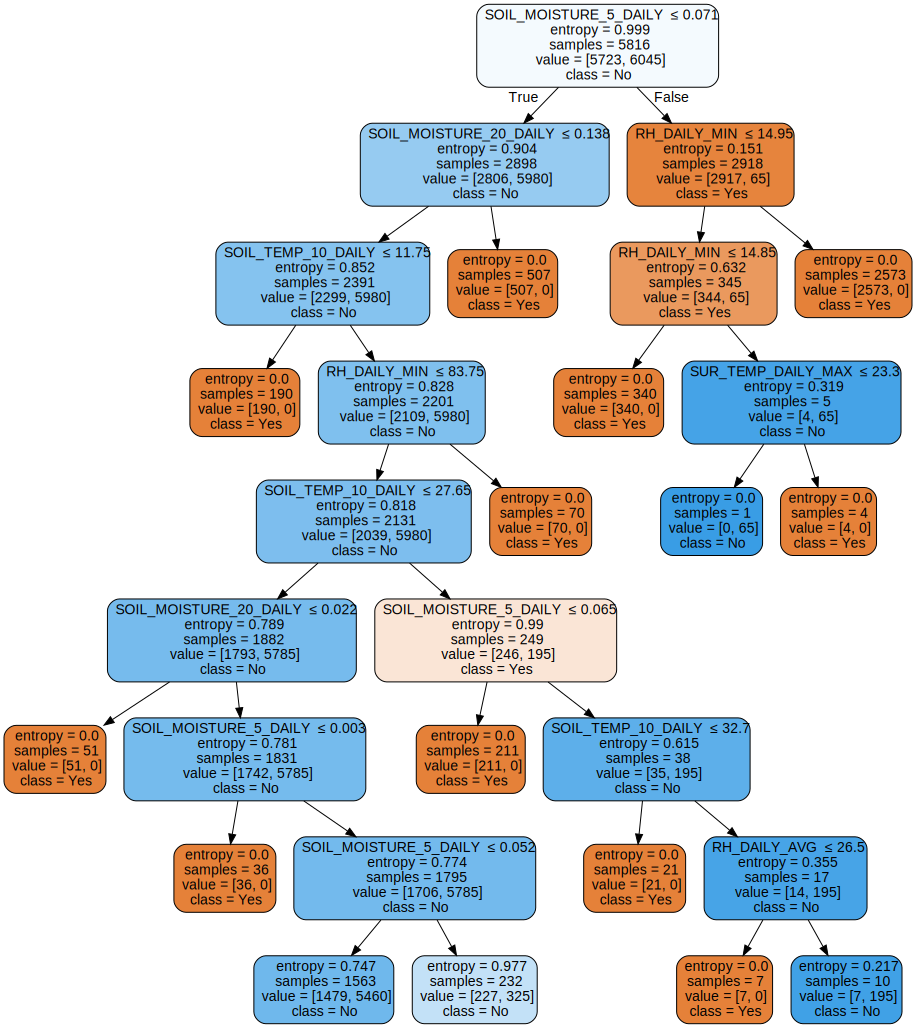

In [53]:
#Tuned DT model decision tree structure view
visualization = tree.export_graphviz(clf_Iteration1, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [54]:
#cross validation score for improved tuned DT model decision tree: Accuracy
cross_val_score(clf_Iteration1,X,y,scoring="recall", cv=3)

array([0.63157895, 0.64102564, 0.63157895])

In [55]:
#Random Over Sampling the imbalanced Dataset
#Random Over Sampling duplicates the existing minority output class and add it to the pool
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [56]:
#Train the model with RandomOversamplier Balanced Data, and default DT model to get a baseline
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [57]:
#make a prediction with newly trained model and show confusion matrix base on how the model predicts on test data
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1415,   29],
       [   0, 1419]], dtype=int64)

In [58]:
#cross validation score for Oversamplied DT model: Accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.96157876, 0.95983234, 0.96436059, 0.96890287, 0.94933613])

In [59]:
#Get report on Oversamplied DT model
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1444
           1       0.98      1.00      0.99      1419

    accuracy                           0.99      2863
   macro avg       0.99      0.99      0.99      2863
weighted avg       0.99      0.99      0.99      2863



In [60]:
# Get feature importance Oversamplied DT model
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.038732
T_DAILY_AVG,0.037089
P_DAILY_CALC,0.003409
SOLARAD_DAILY,0.024088
SUR_TEMP_DAILY_MAX,0.039701
SUR_TEMP_DAILY_AVG,0.010248
RH_DAILY_MIN,0.076872
RH_DAILY_AVG,0.035363
SOIL_MOISTURE_5_DAILY,0.416443
SOIL_MOISTURE_10_DAILY,0.021153


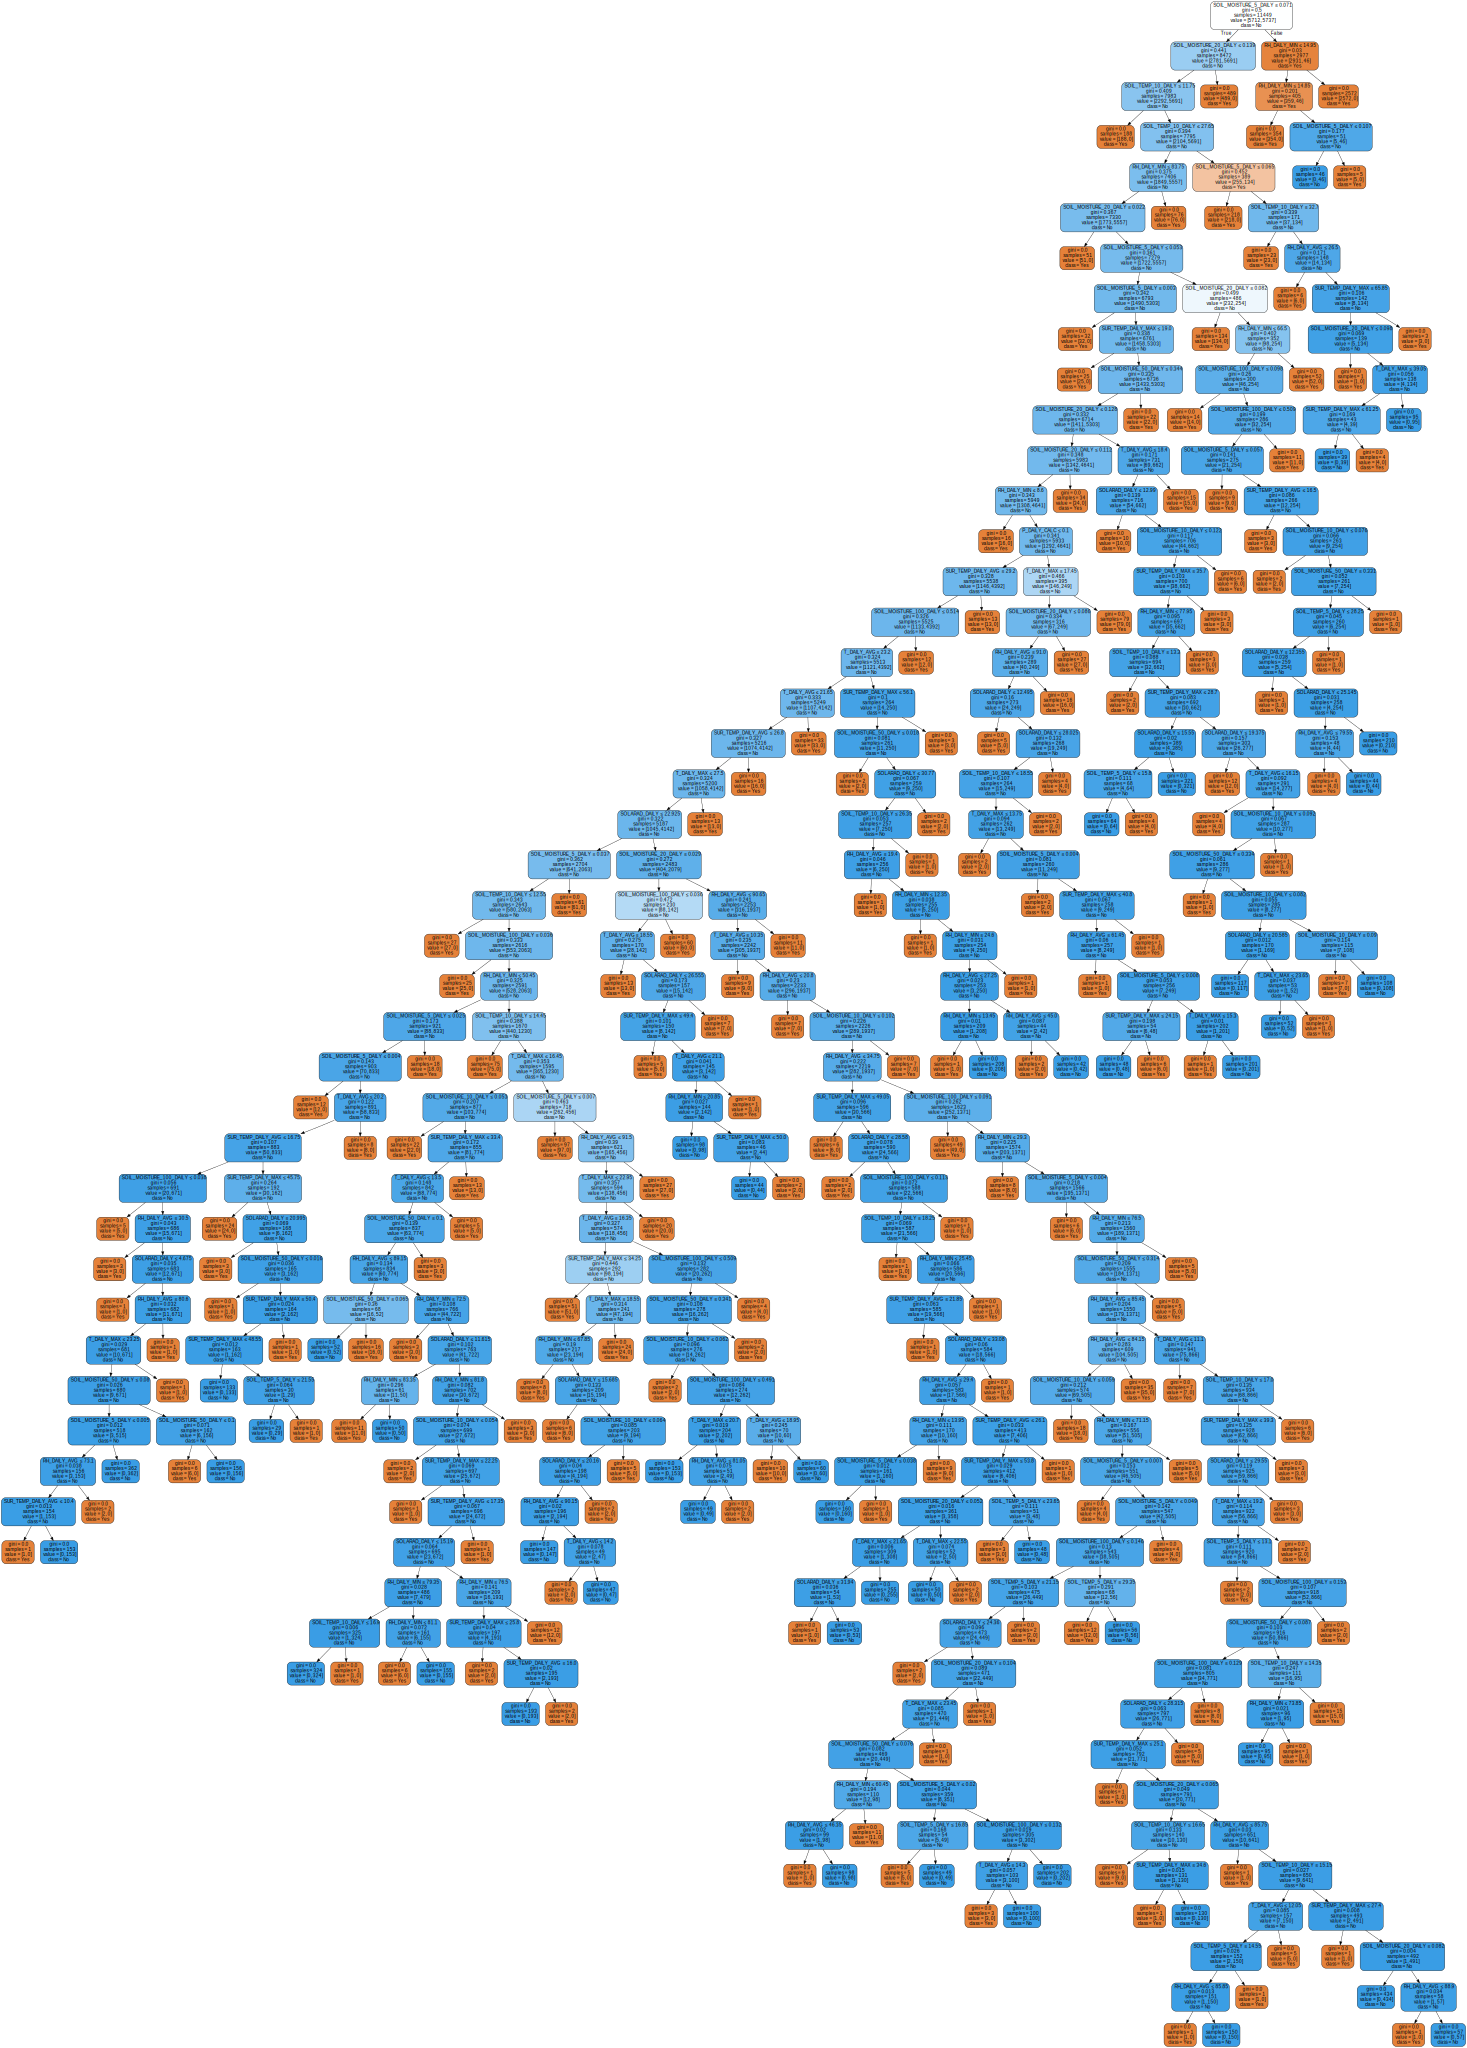

In [61]:
#Display the tree for Oversamplied DT model
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [62]:
#import SMOTE oversamplier
#SMOTE oversamplier is another way to oversample data, but instead of duplicate exact same minority data, it initiates relatively similar minority samples.
from imblearn.over_sampling import SMOTE
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [ ]:
#Train the DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [64]:
#make another prediction using DT model with SMOTE oversampled dataset and default setting and show confusion matrix
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1429,    6],
       [ 699,  729]], dtype=int64)

In [65]:
#cross validation score for DT model with SMOTE oversampled dataset and default setting: accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.90569333, 0.90499476, 0.89203354, 0.93221523, 0.90146751])

In [66]:
#Get report on DT model with SMOTE oversampled dataset and default setting
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1435
           1       0.99      0.51      0.67      1428

    accuracy                           0.75      2863
   macro avg       0.83      0.75      0.74      2863
weighted avg       0.83      0.75      0.74      2863



In [67]:
# Get feature importance of DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.038732
T_DAILY_AVG,0.037089
P_DAILY_CALC,0.003409
SOLARAD_DAILY,0.024088
SUR_TEMP_DAILY_MAX,0.039701
SUR_TEMP_DAILY_AVG,0.010248
RH_DAILY_MIN,0.076872
RH_DAILY_AVG,0.035363
SOIL_MOISTURE_5_DAILY,0.416443
SOIL_MOISTURE_10_DAILY,0.021153


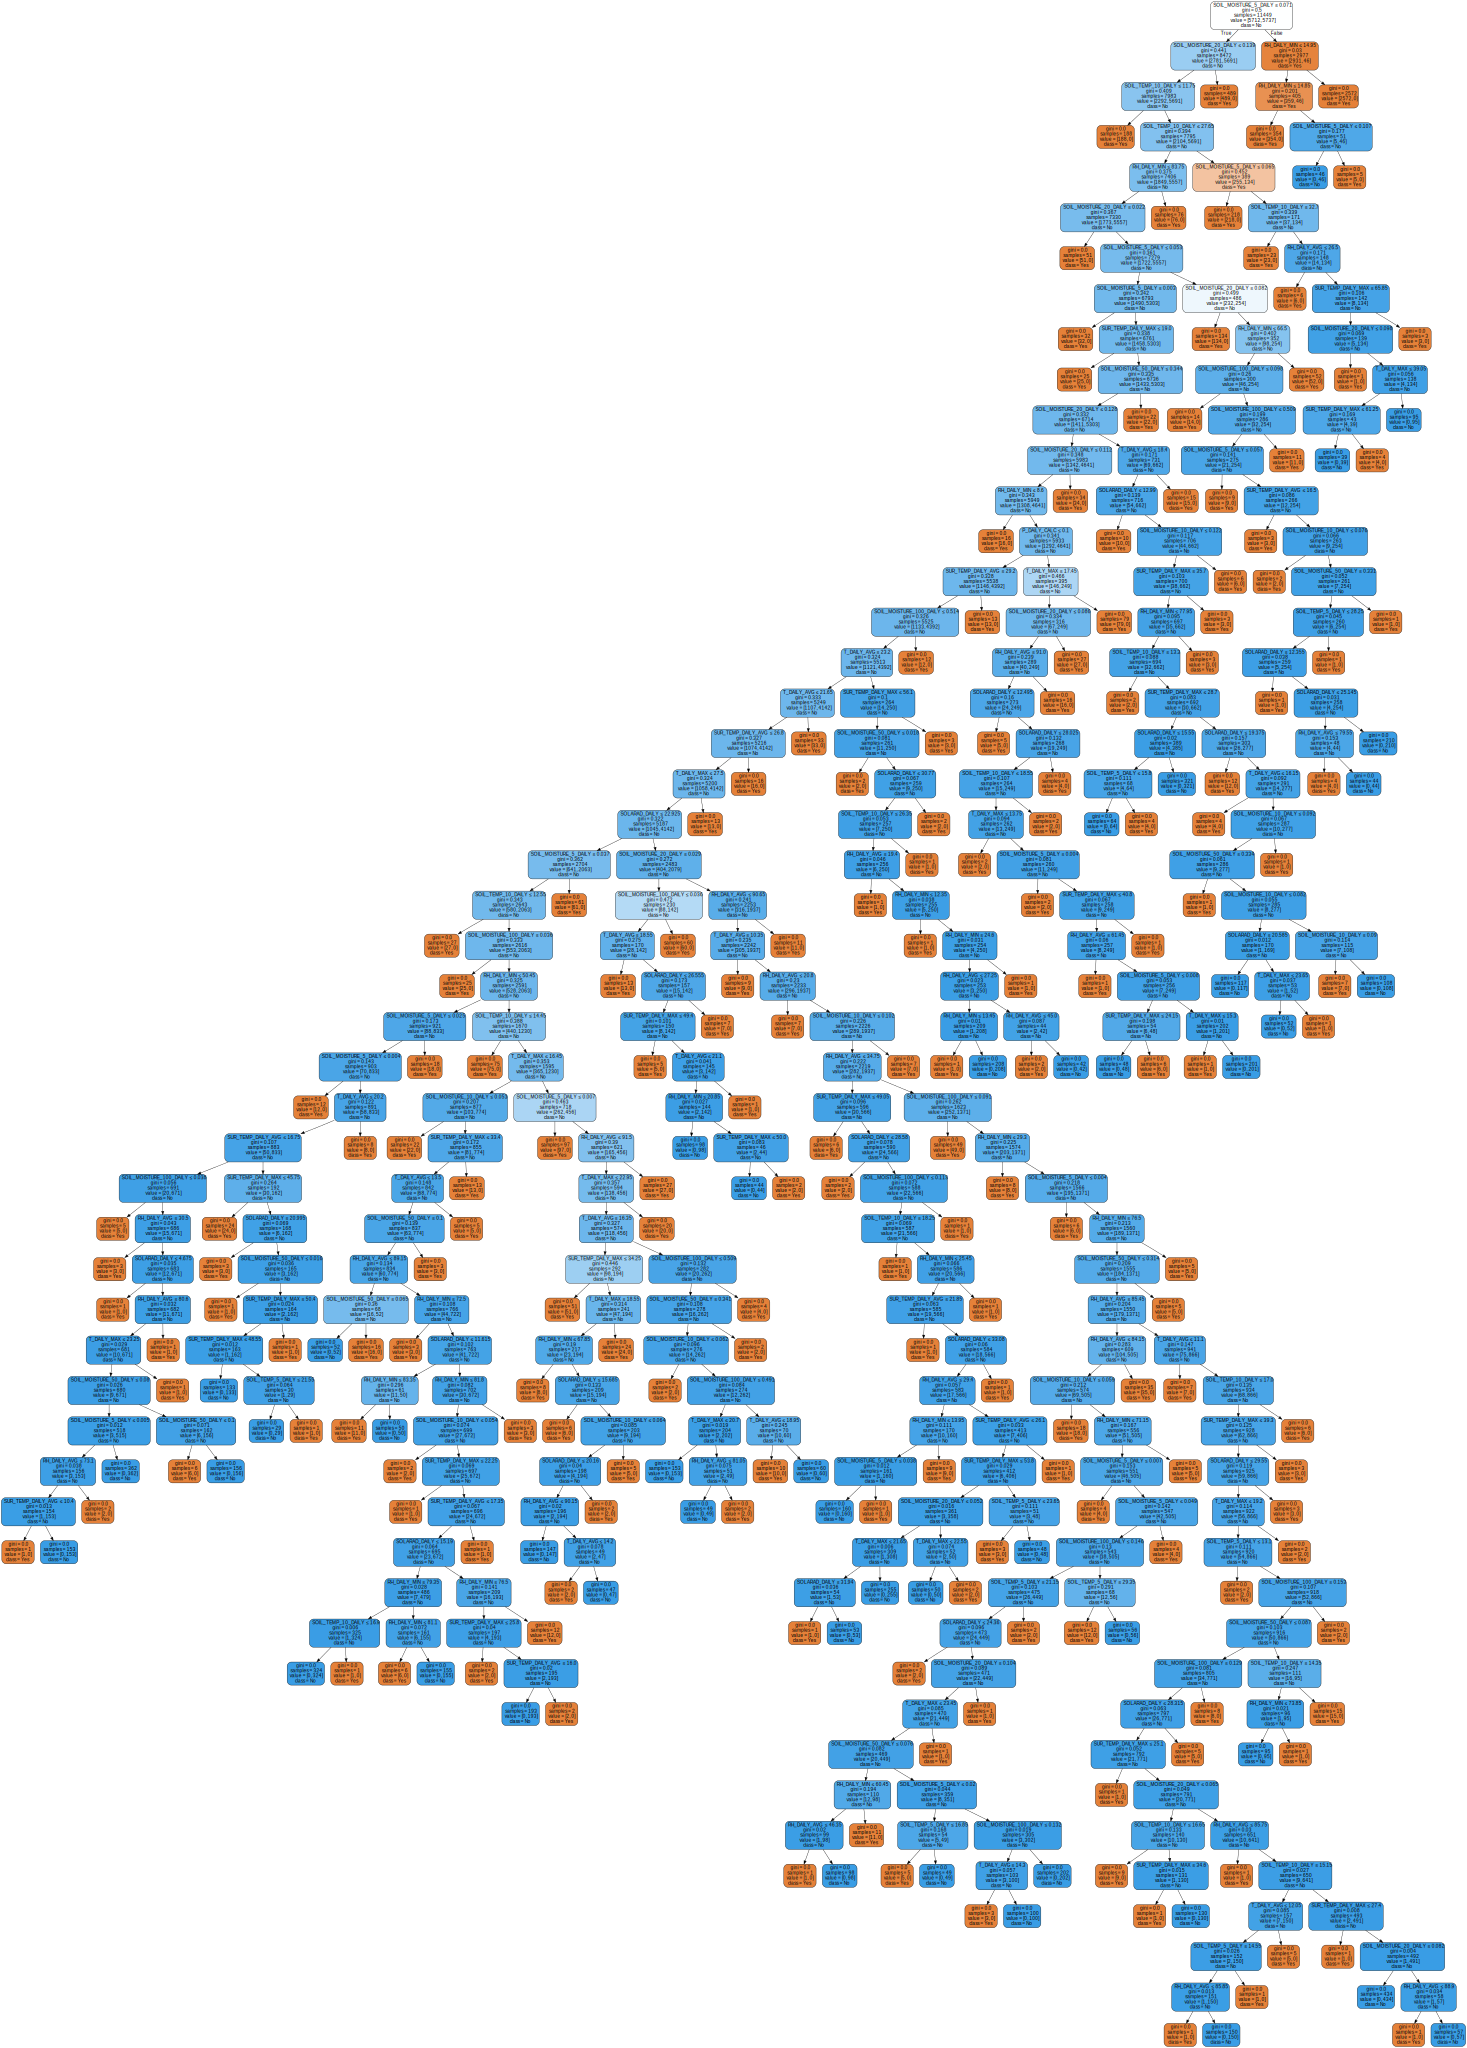

In [68]:
#Display the tree for DT model with SMOTE oversampled dataset and default setting
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [69]:
#Train the DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled = DecisionTreeClassifier(max_depth=30,random_state=4,criterion="entropy")
clf_Iteration2_AfterResampled = clf_Iteration2_AfterResampled.fit(X_train, y_train)

In [70]:
#make another prediction using DT model with SMOTE oversampled dataset and Tuned hyperparameter and show confusion matrix
predictions_iteration2_AfterResampled = clf_Iteration2_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration2_AfterResampled, labels=[0,1])

array([[1317,  118],
       [  28, 1400]], dtype=int64)

In [71]:
#cross validation score for DT model with SMOTE oversampled dataset and Tuned hyperparameter : accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.90674118, 0.90010479, 0.89168414, 0.93151642, 0.90006988])

In [72]:
#Get report on DT model with SMOTE oversampled dataset and Tuned hyperparameter
print(classification_report(y_test,predictions_iteration2_AfterResampled))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1435
           1       0.92      0.98      0.95      1428

    accuracy                           0.95      2863
   macro avg       0.95      0.95      0.95      2863
weighted avg       0.95      0.95      0.95      2863



In [73]:
# Get feature importance of DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration2_AfterResampled.feature_importances_, index=feature_names)

,0
T_DAILY_MAX,0.021205
T_DAILY_AVG,0.012053
P_DAILY_CALC,0.004847
SOLARAD_DAILY,0.030856
SUR_TEMP_DAILY_MAX,0.025453
SUR_TEMP_DAILY_AVG,0.012385
RH_DAILY_MIN,0.054097
RH_DAILY_AVG,0.013607
SOIL_MOISTURE_5_DAILY,0.514305
SOIL_MOISTURE_10_DAILY,0.029942


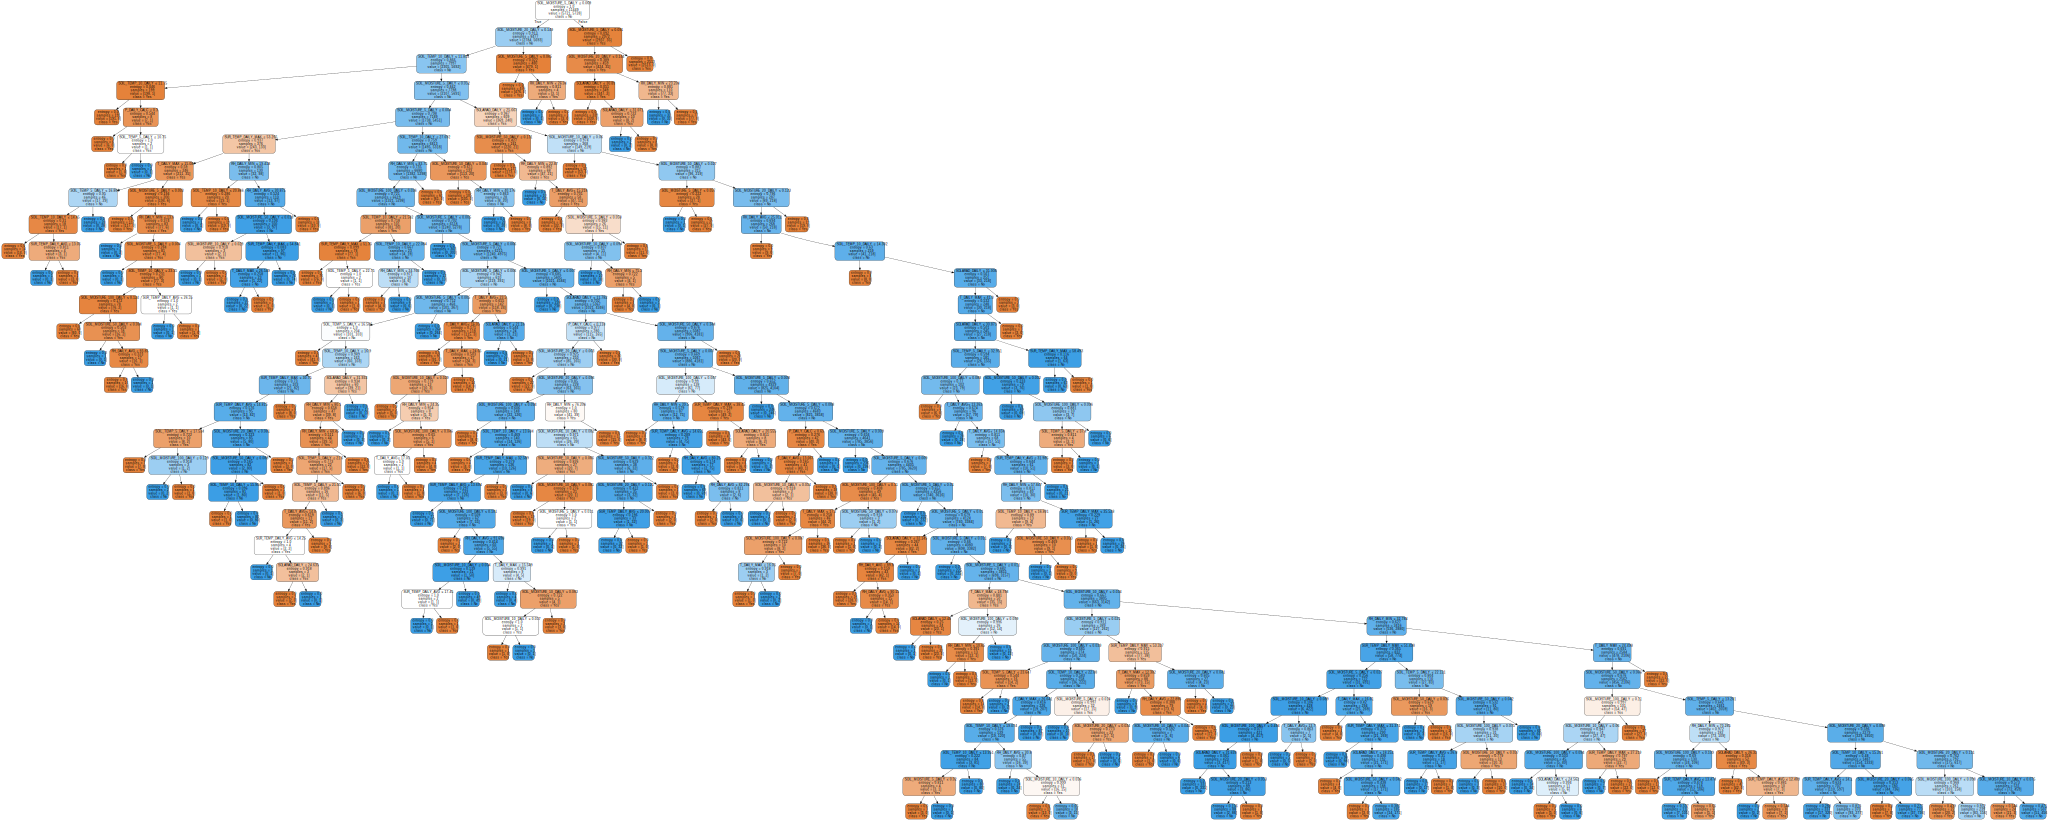

In [74]:
#Display the tree for DT model with SMOTE oversampled dataset and Tuned hyperparameter
visualization = tree.export_graphviz(clf_Iteration2_AfterResampled, out_file=None, feature_names=X_resampled.columns,
                                     class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph